In [30]:
import pandas as pd

df = pd.read_csv('dengue_mod.csv')

print('Información del DataFrame:')
df.info()

print('\nPrimeras 5 filas del DataFrame:')
display(df.head())

Información del DataFrame:
<class 'pandas.DataFrame'>
RangeIndex: 53813 entries, 0 to 53812
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   edad_             53813 non-null  int64  
 1   sexo_             53812 non-null  str    
 2   comuna            50419 non-null  str    
 3   tipo_ss_          53808 non-null  str    
 4   tip_cas_          53812 non-null  float64
 5   pac_hos_          53812 non-null  float64
 6   clas_dengue       41858 non-null  float64
 7   cefalea           53596 non-null  float64
 8   dolrretroo        42226 non-null  float64
 9   malgias           53598 non-null  float64
 10  artralgia         53597 non-null  float64
 11  erupcionr         42225 non-null  float64
 12  dolor_abdo        53594 non-null  float64
 13  vomito            53595 non-null  float64
 14  somnolenci        27160 non-null  float64
 15  hipotensio        42225 non-null  float64
 16  hepatomeg         42225 

,edad_,sexo_,comuna,tipo_ss_,tip_cas_,pac_hos_,clas_dengue,cefalea,dolrretroo,malgias,...,dolor_abdo,vomito,somnolenci,hipotensio,hepatomeg,hem_mucosa,hipotermia,aum_hemato,caida_plaq,acum_liquievento
0,49,M,belen,C,2.0,1.0,NaN,2.0,NaN,1.0,...,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,47,M,belen,C,2.0,2.0,NaN,1.0,NaN,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,46,M,villa hermosa,C,2.0,2.0,NaN,2.0,NaN,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,45,M,NaN,C,2.0,2.0,NaN,1.0,NaN,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,46,M,la candelaria,C,2.0,2.0,NaN,1.0,NaN,1.0,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
for col in df.columns:
    if col != 'edad_':
        df[col] = df[col].astype('category')

print('Información del DataFrame después de la conversión de tipos:')
df.info()

Información del DataFrame después de la conversión de tipos:
<class 'pandas.DataFrame'>
RangeIndex: 53813 entries, 0 to 53812
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   edad_             53813 non-null  int64   
 1   sexo_             53812 non-null  category
 2   comuna            50419 non-null  category
 3   tipo_ss_          53808 non-null  category
 4   tip_cas_          53812 non-null  category
 5   pac_hos_          53812 non-null  category
 6   clas_dengue       41858 non-null  category
 7   cefalea           53596 non-null  category
 8   dolrretroo        42226 non-null  category
 9   malgias           53598 non-null  category
 10  artralgia         53597 non-null  category
 11  erupcionr         42225 non-null  category
 12  dolor_abdo        53594 non-null  category
 13  vomito            53595 non-null  category
 14  somnolenci        27160 non-null  category
 15  hipotensio        42

Eliminamos variables con baja correlación menor al 5%

In [32]:
columns_to_drop = ['artralgia', 'dolrretroo', 'erupcionr', 'hipotermia', 'malgias', 'sexo_']

df = df.drop(columns=columns_to_drop)

# Move 'pac_hos_' to the end
pac_hos_column = df['pac_hos_']
df = df.drop(columns=['pac_hos_'])
df['pac_hos_'] = pac_hos_column

print('DataFrame después de eliminar columnas y reordenar:')
display(df.head())

DataFrame después de eliminar columnas y reordenar:


,edad_,comuna,tipo_ss_,tip_cas_,clas_dengue,cefalea,dolor_abdo,vomito,somnolenci,hipotensio,hepatomeg,hem_mucosa,aum_hemato,caida_plaq,acum_liquievento,pac_hos_
0,49,belen,C,2.0,NaN,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,47,belen,C,2.0,NaN,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,46,villa hermosa,C,2.0,NaN,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,45,NaN,C,2.0,NaN,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,46,la candelaria,C,2.0,NaN,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [33]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 53813 entries, 0 to 53812
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   edad_             53813 non-null  int64   
 1   comuna            50419 non-null  category
 2   tipo_ss_          53808 non-null  category
 3   tip_cas_          53812 non-null  category
 4   clas_dengue       41858 non-null  category
 5   cefalea           53596 non-null  category
 6   dolor_abdo        53594 non-null  category
 7   vomito            53595 non-null  category
 8   somnolenci        27160 non-null  category
 9   hipotensio        42225 non-null  category
 10  hepatomeg         42225 non-null  category
 11  hem_mucosa        27162 non-null  category
 12  aum_hemato        27162 non-null  category
 13  caida_plaq        27165 non-null  category
 14  acum_liquievento  27164 non-null  category
 15  pac_hos_          53812 non-null  category
dtypes: category(15), int64(1)
memory 

In [34]:
print(f"Número de filas antes de eliminar duplicados: {df.shape[0]}")
df.drop_duplicates(inplace=True)
print(f"Número de filas después de eliminar duplicados: {df.shape[0]}")

Número de filas antes de eliminar duplicados: 53813
Número de filas después de eliminar duplicados: 38942


In [35]:
df.info()

<class 'pandas.DataFrame'>
Index: 38942 entries, 0 to 53812
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   edad_             38942 non-null  int64   
 1   comuna            36643 non-null  category
 2   tipo_ss_          38937 non-null  category
 3   tip_cas_          38941 non-null  category
 4   clas_dengue       29481 non-null  category
 5   cefalea           38730 non-null  category
 6   dolor_abdo        38728 non-null  category
 7   vomito            38729 non-null  category
 8   somnolenci        17955 non-null  category
 9   hipotensio        29843 non-null  category
 10  hepatomeg         29843 non-null  category
 11  hem_mucosa        17957 non-null  category
 12  aum_hemato        17957 non-null  category
 13  caida_plaq        17960 non-null  category
 14  acum_liquievento  17959 non-null  category
 15  pac_hos_          38941 non-null  category
dtypes: category(15), int64(1)
memory usage

In [36]:
print(f"Número de filas antes de eliminar filas con 3 o más nulos: {df.shape[0]}")

df_cleaned = df[df.isnull().sum(axis=1) < 3]

#3 filas corresponde a +15% de valores faltantes
print(f"Número de filas después de eliminar filas con 3 o más nulos: {df_cleaned.shape[0]}")

display(df_cleaned.head())

Número de filas antes de eliminar filas con 3 o más nulos: 38942
Número de filas después de eliminar filas con 3 o más nulos: 17958


,edad_,comuna,tipo_ss_,tip_cas_,clas_dengue,cefalea,dolor_abdo,vomito,somnolenci,hipotensio,hepatomeg,hem_mucosa,aum_hemato,caida_plaq,acum_liquievento,pac_hos_
23553,26,laureles,C,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
23879,37,san javier,N,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
23893,26,NaN,C,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
24135,49,el poblado,C,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
24138,65,laureles,C,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [37]:
df_cleaned.info()
len(df_cleaned)

<class 'pandas.DataFrame'>
Index: 17958 entries, 23553 to 53812
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   edad_             17958 non-null  int64   
 1   comuna            17195 non-null  category
 2   tipo_ss_          17958 non-null  category
 3   tip_cas_          17958 non-null  category
 4   clas_dengue       17722 non-null  category
 5   cefalea           17958 non-null  category
 6   dolor_abdo        17958 non-null  category
 7   vomito            17958 non-null  category
 8   somnolenci        17955 non-null  category
 9   hipotensio        17958 non-null  category
 10  hepatomeg         17958 non-null  category
 11  hem_mucosa        17957 non-null  category
 12  aum_hemato        17957 non-null  category
 13  caida_plaq        17958 non-null  category
 14  acum_liquievento  17957 non-null  category
 15  pac_hos_          17958 non-null  category
dtypes: category(15), int64(1)
memory u

17958

In [38]:
print('Porcentaje de valores nulos por columna:')
null_percentages = df_cleaned.isnull().sum() / len(df_cleaned) * 100
print(null_percentages)

columns_to_drop_by_nulls = null_percentages[null_percentages > 15].index.tolist()

if columns_to_drop_by_nulls:
    print(f"\nColumnas a eliminar (más del 15% de nulos): {columns_to_drop_by_nulls}")
    df_cleaned = df_cleaned.drop(columns=columns_to_drop_by_nulls)
    print(f"DataFrame shape después de eliminar columnas: {df_cleaned.shape}")
else:
    print("\nNo se encontraron columnas con más del 15% de valores nulos.")

df_cleaned.info()

Porcentaje de valores nulos por columna:
edad_               0.000000
comuna              4.248803
tipo_ss_            0.000000
tip_cas_            0.000000
clas_dengue         1.314178
cefalea             0.000000
dolor_abdo          0.000000
vomito              0.000000
somnolenci          0.016706
hipotensio          0.000000
hepatomeg           0.000000
hem_mucosa          0.005569
aum_hemato          0.005569
caida_plaq          0.000000
acum_liquievento    0.005569
pac_hos_            0.000000
dtype: float64

No se encontraron columnas con más del 15% de valores nulos.
<class 'pandas.DataFrame'>
Index: 17958 entries, 23553 to 53812
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   edad_             17958 non-null  int64   
 1   comuna            17195 non-null  category
 2   tipo_ss_          17958 non-null  category
 3   tip_cas_          17958 non-null  category
 4   clas_dengue       17722 non-

In [39]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Identify categorical columns with nulls
categorical_cols_with_nulls = df_cleaned.columns[df_cleaned.isnull().any()].tolist()
categorical_cols_with_nulls = [col for col in categorical_cols_with_nulls if df_cleaned[col].dtype == 'category']

if not categorical_cols_with_nulls:
    print("No se encontraron columnas categóricas con valores nulos para imputar con KNN.")
else:
    print(f"Columnas categóricas con nulos a imputar: {categorical_cols_with_nulls}")

    # Create a copy for imputation to avoid modifying the original during intermediate steps
    df_imputed = df_cleaned.copy()

    # Dictionary to store LabelEncoders for inverse transformation
    label_encoders = {}

    # Prepare a temporary DataFrame for numerical imputation
    df_temp_numeric_impute = pd.DataFrame(index=df_imputed.index)

    for col in categorical_cols_with_nulls:
        le = LabelEncoder()
        # Fit LabelEncoder on all unique non-null values from the original df_cleaned column
        # This ensures all possible categories are learned before transformation
        le.fit(df_cleaned[col].dropna())
        label_encoders[col] = le

        # Transform the column: convert categories to integers, NaNs remain NaN
        # Use .apply() with a lambda to correctly handle NaNs while transforming
        df_temp_numeric_impute[col] = df_imputed[col].apply(lambda x: label_encoders[col].transform([x])[0] if pd.notna(x) else np.nan)

    # Initialize KNNImputer
    # n_neighbors can be adjusted based on data characteristics
    imputer = KNNImputer(n_neighbors=5)

    # Perform imputation on the temporary numeric DataFrame
    imputed_values_numeric = imputer.fit_transform(df_temp_numeric_impute)

    # Convert the imputed numpy array back to a DataFrame with appropriate column names
    df_imputed_numeric = pd.DataFrame(imputed_values_numeric, columns=categorical_cols_with_nulls, index=df_imputed.index)

    # Round the imputed values to the nearest integer (since they were originally integer labels)
    df_imputed_numeric = df_imputed_numeric.round().astype(int)

    # Inverse transform the imputed numeric values back to original categories
    for col in categorical_cols_with_nulls:
        le = label_encoders[col]
        num_classes = len(le.classes_)

        # Clip the imputed integer labels to the valid range [0, num_classes-1]
        # This prevents 'y contains previously unseen labels' errors if KNNImputer
        # predicts values outside the original label range.
        df_imputed[col] = le.inverse_transform(df_imputed_numeric[col].clip(0, num_classes - 1))
        df_imputed[col] = df_imputed[col].astype('category') # Ensure it's category type again

    # Now, update the original df_cleaned with the imputed columns
    df_cleaned[categorical_cols_with_nulls] = df_imputed[categorical_cols_with_nulls]

    print("\nImputación con KNN completada.")
    print("Verificando valores nulos después de la imputación:")
    print(df_cleaned[categorical_cols_with_nulls].isnull().sum())
    print("\nInformación del DataFrame después de la imputación:")
    df_cleaned.info()

Columnas categóricas con nulos a imputar: ['comuna', 'clas_dengue', 'somnolenci', 'hem_mucosa', 'aum_hemato', 'acum_liquievento']

Imputación con KNN completada.
Verificando valores nulos después de la imputación:
comuna              0
clas_dengue         0
somnolenci          0
hem_mucosa          0
aum_hemato          0
acum_liquievento    0
dtype: int64

Información del DataFrame después de la imputación:
<class 'pandas.DataFrame'>
Index: 17958 entries, 23553 to 53812
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   edad_             17958 non-null  int64   
 1   comuna            17958 non-null  category
 2   tipo_ss_          17958 non-null  category
 3   tip_cas_          17958 non-null  category
 4   clas_dengue       17958 non-null  category
 5   cefalea           17958 non-null  category
 6   dolor_abdo        17958 non-null  category
 7   vomito            17958 non-null  category
 8   somnol

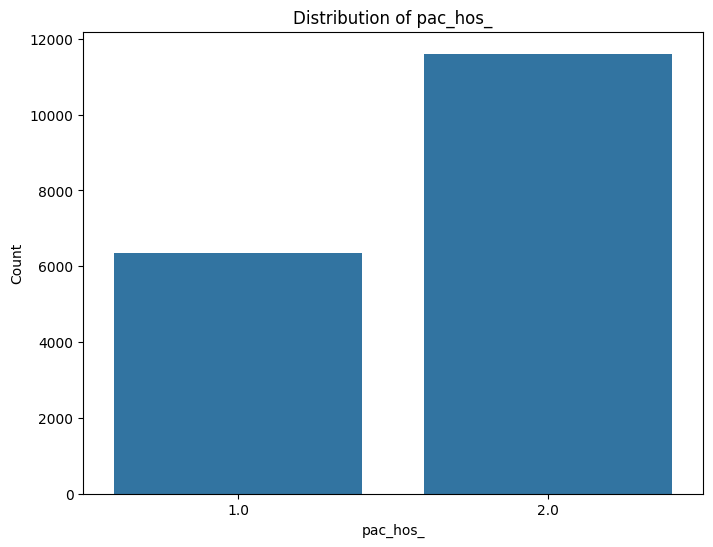

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'pac_hos_' is the target variable
target_variable = 'pac_hos_'

plt.figure(figsize=(8, 6))
sns.countplot(x=target_variable, data=df_cleaned)
plt.title(f'Distribution of {target_variable}')
plt.xlabel(target_variable)
plt.ylabel('Count')
plt.show()

In [41]:
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
import pandas as pd

# =========================================================
# RESERVA DE DATOS FUTUROS (PUNTO 5.1)
# ---------------------------------------------------------
# Separamos 50 registros COMPLETOS del dataset limpio para
# usarlos únicamente al final en predicción futura.
# Estos registros NO participan en entrenamiento/validación.
# =========================================================
df_complete_cases = df_cleaned.dropna().copy()
df_future_raw = df_complete_cases.sample(n=50, random_state=42)
df_model_source = df_cleaned.drop(index=df_future_raw.index).copy()

print('Registros reservados para 5.1 (datos futuros):', len(df_future_raw))
print('Registros disponibles para modelado:', len(df_model_source))

# =========================================================
# PREPROCESAMIENTO PARA MODELADO
# ---------------------------------------------------------
# 1) Separar X/y
# 2) One-Hot Encoding para variables categóricas
# 3) Balanceo de clases con SMOTE
# =========================================================
# Separate features (X) and target (y)
X = df_model_source.drop('pac_hos_', axis=1)
y = df_model_source['pac_hos_']

# Identify categorical columns for One-Hot Encoding
categorical_cols = X.select_dtypes(include='category').columns

# Apply One-Hot Encoding to categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = encoder.fit_transform(X[categorical_cols])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols), index=X.index)

# Drop original categorical columns and concatenate encoded ones
X_numeric = X.drop(columns=categorical_cols)
X_processed = pd.concat([X_numeric, X_encoded_df], axis=1)

print("Shape of X_processed before SMOTE:", X_processed.shape)
print("Distribution of target before SMOTE:\n", y.value_counts())

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5)
X_resampled, y_resampled = smote.fit_resample(X_processed, y)

print("\nShape of X_resampled after SMOTE:", X_resampled.shape)
print("Distribution of target after SMOTE:\n", y_resampled.value_counts())

# Reconstruct the balanced DataFrame
# Nota: este dataframe sí se usa para entrenamiento/modelado
# y NO contiene los 50 casos reservados.
df_balanced = pd.concat([X_resampled, y_resampled], axis=1)

print("\nFirst 5 rows of the balanced DataFrame:")
display(df_balanced.head())

Registros reservados para 5.1 (datos futuros): 50
Registros disponibles para modelado: 17908
Shape of X_processed before SMOTE: (17908, 56)
Distribution of target before SMOTE:
 pac_hos_
2.0    11577
1.0     6331
Name: count, dtype: int64

Shape of X_resampled after SMOTE: (23154, 56)
Distribution of target after SMOTE:
 pac_hos_
1.0    11577
2.0    11577
Name: count, dtype: int64

First 5 rows of the balanced DataFrame:


,edad_,comuna_altavista,comuna_aranjuez,comuna_belen,comuna_buenos aires,comuna_castilla,comuna_corregimiento de san cristobal,comuna_corregimiento de santa elena,comuna_doce de octubre,comuna_el poblado,...,hepatomeg_2.0,hem_mucosa_1.0,hem_mucosa_2.0,aum_hemato_1.0,aum_hemato_2.0,caida_plaq_1.0,caida_plaq_2.0,acum_liquievento_1.0,acum_liquievento_2.0,pac_hos_
0,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0
1,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0
2,26,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0
3,49,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0
4,65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0


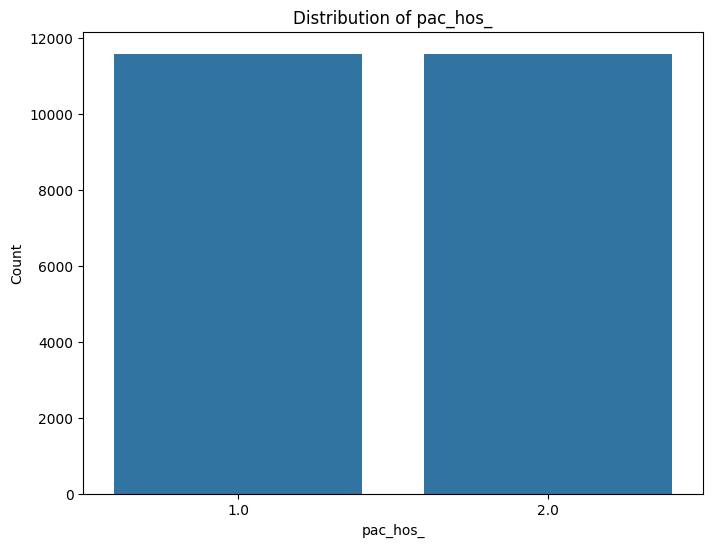

In [42]:
# Assuming 'pac_hos_' is the target variable
target_variable = 'pac_hos_'

plt.figure(figsize=(8, 6))
sns.countplot(x=target_variable, data=df_balanced)
plt.title(f'Distribution of {target_variable}')
plt.xlabel(target_variable)
plt.ylabel('Count')
plt.show()

In [43]:
df_balanced.info()

<class 'pandas.DataFrame'>
RangeIndex: 23154 entries, 0 to 23153
Data columns (total 57 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   edad_                                  23154 non-null  int64   
 1   comuna_altavista                       23154 non-null  float64 
 2   comuna_aranjuez                        23154 non-null  float64 
 3   comuna_belen                           23154 non-null  float64 
 4   comuna_buenos aires                    23154 non-null  float64 
 5   comuna_castilla                        23154 non-null  float64 
 6   comuna_corregimiento de san cristobal  23154 non-null  float64 
 7   comuna_corregimiento de santa elena    23154 non-null  float64 
 8   comuna_doce de octubre                 23154 non-null  float64 
 9   comuna_el poblado                      23154 non-null  float64 
 10  comuna_guayabal                        23154 non-null  float64 
 11  

In [44]:
columns_to_drop_redundant = [
    'cefalea_2.0',
    'dolor_abdo_2.0',
    'vomito_2.0',
    'somnolenci_2.0',
    'hipotensio_2.0',
    'hem_mucosa_2.0',
    'aum_hemato_2.0',
    'caida_plaq_2.0',
    'acum_liquievento_2.0',
    'hepatomeg_2.0'
]

df_balanced = df_balanced.drop(columns=columns_to_drop_redundant)

print("DataFrame después de eliminar variables redundantes:")
df_balanced.info()

DataFrame después de eliminar variables redundantes:
<class 'pandas.DataFrame'>
RangeIndex: 23154 entries, 0 to 23153
Data columns (total 47 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   edad_                                  23154 non-null  int64   
 1   comuna_altavista                       23154 non-null  float64 
 2   comuna_aranjuez                        23154 non-null  float64 
 3   comuna_belen                           23154 non-null  float64 
 4   comuna_buenos aires                    23154 non-null  float64 
 5   comuna_castilla                        23154 non-null  float64 
 6   comuna_corregimiento de san cristobal  23154 non-null  float64 
 7   comuna_corregimiento de santa elena    23154 non-null  float64 
 8   comuna_doce de octubre                 23154 non-null  float64 
 9   comuna_el poblado                      23154 non-null  float64 
 10  comuna_guayabal 

In [45]:
df_balanced.info()

<class 'pandas.DataFrame'>
RangeIndex: 23154 entries, 0 to 23153
Data columns (total 47 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   edad_                                  23154 non-null  int64   
 1   comuna_altavista                       23154 non-null  float64 
 2   comuna_aranjuez                        23154 non-null  float64 
 3   comuna_belen                           23154 non-null  float64 
 4   comuna_buenos aires                    23154 non-null  float64 
 5   comuna_castilla                        23154 non-null  float64 
 6   comuna_corregimiento de san cristobal  23154 non-null  float64 
 7   comuna_corregimiento de santa elena    23154 non-null  float64 
 8   comuna_doce de octubre                 23154 non-null  float64 
 9   comuna_el poblado                      23154 non-null  float64 
 10  comuna_guayabal                        23154 non-null  float64 
 11  

In [46]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import joblib
# Separate features (X) and target (y)
X_final = df_balanced.drop('pac_hos_', axis=1)
y_final = df_balanced['pac_hos_']

# Initialize LabelEncoder
label_encoder_target = LabelEncoder()

# Encode the target variable (default mapping: 1.0 -> 0, 2.0 -> 1)
y_encoded_raw = label_encoder_target.fit_transform(y_final)

# Adjust the encoded values to map 1.0 to 1 and 2.0 to 0
y_encoded = 1 - y_encoded_raw

print("Original target variable unique values:", y_final.unique())
print("Encoded target variable unique values:", np.unique(y_encoded))
print("Mapping of original values to encoded values (desired):")
for original_val, encoded_val_raw in zip(label_encoder_target.classes_, label_encoder_target.transform(label_encoder_target.classes_)):
    # Apply the inversion to show the desired mapping
    print(f"  {original_val} -> {1 - encoded_val_raw}")

print("\nDistribution of encoded target variable:")
print(pd.Series(y_encoded).value_counts())

joblib.dump(label_encoder_target, 'label_encoder_target.joblib')


# Store the encoded target variable and the encoder
# X_final contains the features (already one-hot encoded where applicable)
# y_encoded contains the label-encoded target
# label_encoder_target contains the fitted LabelEncoder object

Original target variable unique values: [2.0, 1.0]
Categories (2, float64): [1.0, 2.0]
Encoded target variable unique values: [0 1]
Mapping of original values to encoded values (desired):
  1.0 -> 1
  2.0 -> 0

Distribution of encoded target variable:
0    11577
1    11577
Name: count, dtype: int64


['label_encoder_target.joblib']

## Evaluación formal para entregable (70/30 + CV en train)

Este bloque cumple la rúbrica de modelamiento/evaluación:
- división estratificada 70/30,
- ajuste de hiperparámetros con Cross Validation solo en train,
- evaluación final en test para seleccionar el mejor modelo.

In [48]:
# =========================================================
# EVALUACIÓN FORMAL (RÚBRICA)
# ---------------------------------------------------------
# Este bloque es el ÚNICO bloque oficial de entrenamiento.
# Cumple:
# - Split estratificado 70/30
# - Hiperparametrización con CV SOLO en train
# - Evaluación final sobre test
# =========================================================
import numpy as np
import pandas as pd
import joblib

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold, ParameterGrid, train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# XGBoost opcional
xgb_available = True
try:
    from xgboost import XGBClassifier
except ImportError:
    xgb_available = False
    print('XGBoost no disponible: se evaluarán 7 modelos en esta fase formal.')

# Normalizar nombres de columnas para evitar problemas de serialización
X_model = X_final.copy()
X_model.columns = X_model.columns.astype(str)
y_model = pd.Series(y_encoded, name='pac_hos_').astype(int)

# 70/30 estratificado (SIN usar test para tuning)
X_train, X_test, y_train, y_test = train_test_split(
    X_model,
    y_model,
    test_size=0.30,
    random_state=42,
    stratify=y_model
)

print('Shapes:')
print('X_train:', X_train.shape, '| X_test:', X_test.shape)
print('Distribución train:')
print(y_train.value_counts(normalize=True).sort_index())
print('Distribución test:')
print(y_test.value_counts(normalize=True).sort_index())

cv_train = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Definición de modelos para evaluación formal
formal_spaces = {
    'RegresionLogistica': {
        'tipo_modelo': 'Clasico',
        'pipeline': Pipeline([
            ('scaler', StandardScaler()),
            ('model', LogisticRegression(random_state=42))
        ]),
        'param_grid': {
            'model__solver': ['liblinear', 'lbfgs'],
            'model__C': [0.1, 1.0, 10.0],
            'model__penalty': ['l2'],
            'model__max_iter': [500]
        }
    },
    'ArbolDecision': {
        'tipo_modelo': 'Clasico',
        'pipeline': Pipeline([
            ('model', DecisionTreeClassifier(random_state=42))
        ]),
        'param_grid': {
            'model__criterion': ['gini', 'entropy'],
            'model__max_depth': [None, 5, 10, 20],
            'model__min_samples_split': [2, 10],
            'model__min_samples_leaf': [1, 5]
        }
    },
    'KNN': {
        'tipo_modelo': 'Clasico',
        'pipeline': Pipeline([
            ('scaler', StandardScaler()),
            ('model', KNeighborsClassifier())
        ]),
        'param_grid': {
            'model__n_neighbors': [5, 9, 15],
            'model__weights': ['uniform', 'distance'],
            'model__metric': ['euclidean', 'manhattan']
        }
    },
    'SVM': {
        'tipo_modelo': 'Clasico',
        'pipeline': Pipeline([
            ('scaler', StandardScaler()),
            ('model', SVC(random_state=42))
        ]),
        'param_grid': {
            'model__C': [1.0, 5.0],
            'model__kernel': ['rbf', 'linear'],
            'model__gamma': ['scale']
        }
    },
    'RedNeuronalMLP': {
        'tipo_modelo': 'Clasico',
        'pipeline': Pipeline([
            ('scaler', StandardScaler()),
            ('model', MLPClassifier(
                random_state=42,
                early_stopping=True,
                n_iter_no_change=15,
                validation_fraction=0.1
            ))
        ]),
        'param_grid': [
            {
                'model__solver': ['sgd'],
                'model__activation': ['relu', 'tanh'],
                'model__hidden_layer_sizes': [(20,), (50,), (20, 20)],
                'model__alpha': [0.0001, 0.001],
                'model__learning_rate': ['constant', 'adaptive'],
                'model__learning_rate_init': [0.001, 0.01],
                'model__momentum': [0.5, 0.9],
                'model__max_iter': [200]
            },
            {
                'model__solver': ['adam'],
                'model__activation': ['relu', 'tanh'],
                'model__hidden_layer_sizes': [(20,), (50,), (20, 20)],
                'model__alpha': [0.0001, 0.001],
                'model__learning_rate_init': [0.001, 0.01],
                'model__max_iter': [200]
            }
        ]
    },
    'RandomForest': {
        'tipo_modelo': 'Ensamble (Bagging)',
        'pipeline': Pipeline([
            ('model', RandomForestClassifier(random_state=42, n_jobs=-1))
        ]),
        'param_grid': {
            'model__n_estimators': [100, 200],
            'model__max_depth': [None, 20],
            'model__min_samples_split': [2, 10],
            'model__min_samples_leaf': [1, 5]
        }
    },
    'VotingClassifier': {
        'tipo_modelo': 'Ensamble (Votacion)',
        'pipeline': Pipeline([
            ('scaler', StandardScaler()),
            ('model', VotingClassifier(
                estimators=[
                    ('lr', LogisticRegression(random_state=42, solver='lbfgs', max_iter=500)),
                    ('svm', SVC(random_state=42, kernel='rbf', C=1.0, gamma='scale', probability=True)),
                    ('knn', KNeighborsClassifier(n_neighbors=9, weights='distance', metric='euclidean'))
                ],
                voting='soft'
            ))
        ]),
        'param_grid': {
            'model__weights': [(1, 1, 1), (2, 1, 1), (1, 2, 1), (1, 1, 2)]
        }
    }
}

if xgb_available:
    formal_spaces['XGBoost'] = {
        'tipo_modelo': 'Ensamble (Boosting)',
        'pipeline': Pipeline([
            ('model', XGBClassifier(
                random_state=42,
                eval_metric='logloss',
                tree_method='hist'
            ))
        ]),
        'param_grid': {
            'model__n_estimators': [100, 200],
            'model__max_depth': [3, 6],
            'model__learning_rate': [0.05, 0.1],
            'model__subsample': [0.8, 1.0],
            'model__colsample_bytree': [0.8, 1.0]
        }
    }

formal_results = []
formal_best_estimators = {}

for model_name, cfg in formal_spaces.items():
    print('\n' + '=' * 90)
    print(f'Entrenando {model_name} | {cfg["tipo_modelo"]}')

    n_candidates = len(list(ParameterGrid(cfg['param_grid'])))
    n_fits = n_candidates * cv_train.get_n_splits()
    print(f'Combinaciones: {n_candidates} | Ajustes CV: {n_fits}')

    search = GridSearchCV(
        estimator=cfg['pipeline'],
        param_grid=cfg['param_grid'],
        scoring='f1_macro',
        cv=cv_train,
        n_jobs=1,
        verbose=1,
        refit=True,
        return_train_score=False
    )
    search.fit(X_train, y_train)

    best_model_local = search.best_estimator_
    y_pred_test = best_model_local.predict(X_test)

    formal_best_estimators[model_name] = best_model_local
    formal_results.append({
        'modelo': model_name,
        'tipo_modelo': cfg['tipo_modelo'],
        'cv_best_f1_macro_train': search.best_score_,
        'test_f1_macro': f1_score(y_test, y_pred_test, average='macro'),
        'test_f1_pos': f1_score(y_test, y_pred_test, pos_label=1),
        'test_recall_pos': recall_score(y_test, y_pred_test, pos_label=1),
        'test_precision_pos': precision_score(y_test, y_pred_test, pos_label=1),
        'test_accuracy': accuracy_score(y_test, y_pred_test),
        'best_params': search.best_params_,
        'n_combinaciones': n_candidates
    })

formal_summary_df = pd.DataFrame(formal_results).sort_values('test_f1_macro', ascending=False)

print('\nRanking formal por desempeño en TEST (criterio principal):')
display(formal_summary_df[
    ['modelo', 'tipo_modelo', 'cv_best_f1_macro_train', 'test_f1_macro', 'test_f1_pos', 'test_recall_pos', 'test_precision_pos', 'test_accuracy']
])

best_formal_model_name = formal_summary_df.iloc[0]['modelo']
best_formal_model = formal_best_estimators[best_formal_model_name]

print(f'\nMejor modelo formal (por TEST F1-macro): {best_formal_model_name}')
print('Hiperparámetros óptimos:')
print(formal_summary_df.iloc[0]['best_params'])

# Matriz de confusión del mejor modelo formal
best_y_pred_test = best_formal_model.predict(X_test)
cm = confusion_matrix(y_test, best_y_pred_test)

print('\nMatriz de confusión del mejor modelo (filas=real, columnas=predicho):')
print(cm)

# Exportación de artefactos de la fase formal
joblib.dump(best_formal_model, 'best_model_formal_7030.joblib')
joblib.dump(list(X_train.columns), 'model_input_columns.joblib')

print('\nArtefactos exportados:')
print('- best_model_formal_7030.joblib')
print('- model_input_columns.joblib')

Shapes:
X_train: (16207, 46) | X_test: (6947, 46)
Distribución train:
pac_hos_
0    0.499969
1    0.500031
Name: proportion, dtype: float64
Distribución test:
pac_hos_
0    0.500072
1    0.499928
Name: proportion, dtype: float64

Entrenando RegresionLogistica | Clasico
Combinaciones: 6 | Ajustes CV: 18
Fitting 3 folds for each of 6 candidates, totalling 18 fits

Entrenando ArbolDecision | Clasico
Combinaciones: 32 | Ajustes CV: 96
Fitting 3 folds for each of 32 candidates, totalling 96 fits

Entrenando KNN | Clasico
Combinaciones: 12 | Ajustes CV: 36
Fitting 3 folds for each of 12 candidates, totalling 36 fits

Entrenando SVM | Clasico
Combinaciones: 4 | Ajustes CV: 12
Fitting 3 folds for each of 4 candidates, totalling 12 fits

Entrenando RedNeuronalMLP | Clasico
Combinaciones: 120 | Ajustes CV: 360
Fitting 3 folds for each of 120 candidates, totalling 360 fits

Entrenando RandomForest | Ensamble (Bagging)
Combinaciones: 16 | Ajustes CV: 48
Fitting 3 folds for each of 16 candidates, t

,modelo,tipo_modelo,cv_best_f1_macro_train,test_f1_macro,test_f1_pos,test_recall_pos,test_precision_pos,test_accuracy
7,XGBoost,Ensamble (Boosting),0.814332,0.820776,0.811875,0.771667,0.856504,0.821218
5,RandomForest,Ensamble (Bagging),0.795795,0.807662,0.801958,0.778290,0.827111,0.807831
3,SVM,Clasico,0.784994,0.796306,0.786836,0.750360,0.827039,0.796747
4,RedNeuronalMLP,Clasico,0.773659,0.788359,0.782144,0.759286,0.806422,0.788542
6,VotingClassifier,Ensamble (Votacion),0.770172,0.785540,0.776155,0.742298,0.813249,0.785951
1,ArbolDecision,Clasico,0.766972,0.776137,0.767758,0.739130,0.798693,0.776450
0,RegresionLogistica,Clasico,0.738254,0.748792,0.735160,0.695364,0.779787,0.749532
2,KNN,Clasico,0.729471,0.739396,0.719626,0.665131,0.783848,0.740895



Mejor modelo formal (por TEST F1-macro): XGBoost
Hiperparámetros óptimos:
{'model__colsample_bytree': 1.0, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 200, 'model__subsample': 0.8}

Matriz de confusión del mejor modelo (filas=real, columnas=predicho):
[[3025  449]
 [ 793 2680]]

Artefactos exportados:
- best_model_formal_7030.joblib
- model_input_columns.joblib


## Despliegue mínimo en notebook (5.1 a 5.4)

En este bloque se construye un conjunto de datos de entrada nuevo, se prepara con el mismo esquema de variables del modelo y se realiza la predicción e interpretación.

In [50]:
# =========================================================
# 5.1 a 5.4 - PREDICCIÓN SOBRE DATOS FUTUROS NO USADOS
# ---------------------------------------------------------
# Usamos los 50 registros reservados en df_future_raw.
# Estos datos se apartaron antes del modelado.
# =========================================================
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

# 5.1/5.2 Conjunto de entrada nuevo (50 registros)
future_input_raw = df_future_raw.copy()
print('Registros futuros reservados:', len(future_input_raw))

# 5.3 Preparar datos nuevos con el mismo pipeline de columnas
# 1) Separar X de la variable objetivo original
X_future_raw = future_input_raw.drop(columns=['pac_hos_'])

# 2) Aplicar el mismo One-Hot Encoder entrenado en modelado
X_future_encoded = encoder.transform(X_future_raw[categorical_cols])
X_future_encoded_df = pd.DataFrame(
    X_future_encoded,
    columns=encoder.get_feature_names_out(categorical_cols),
    index=X_future_raw.index
)

# 3) Unir numéricas + codificadas y eliminar columnas redundantes igual que en entrenamiento
X_future_numeric = X_future_raw.drop(columns=categorical_cols)
X_future_processed = pd.concat([X_future_numeric, X_future_encoded_df], axis=1)
X_future_processed = X_future_processed.drop(columns=columns_to_drop_redundant, errors='ignore')

# 4) Alinear columnas con el modelo formal
required_columns = joblib.load('model_input_columns.joblib')
X_future_prepared = X_future_processed.reindex(columns=required_columns, fill_value=0)

# 5.4 Predicción e interpretación
loaded_model = joblib.load('best_model_formal_7030.joblib')
pred_binary = loaded_model.predict(X_future_prepared)

# Mapeo binario usado en el proyecto: 1 => hospitalización sí, 0 => no
y_future_true = (future_input_raw['pac_hos_'].astype(float) == 1.0).astype(int)
pred_label = np.where(pred_binary == 1, 'Hospitalización: Sí', 'Hospitalización: No')
real_label = np.where(y_future_true == 1, 'Hospitalización: Sí', 'Hospitalización: No')

# Columna de acierto
acerto = np.where(pred_binary == y_future_true.values, 'Sí', 'No')

pred_df = pd.DataFrame({
    'pac_hos_original': future_input_raw['pac_hos_'].values,
    'target_bin_real': y_future_true.values,
    'real_interpretacion': real_label,
    'pred_binaria': pred_binary,
    'pred_interpretacion': pred_label,
    'acerto': acerto
}, index=X_future_prepared.index)

# Resumen de aciertos/fallos
total_aciertos = int((pred_df['acerto'] == 'Sí').sum())
total_fallos = int((pred_df['acerto'] == 'No').sum())

print('Comparativa completa (real vs predicción) sobre 50 datos futuros:')
display(pred_df)

print('\nResumen de desempeño en 50 registros futuros:')
print('Total de aciertos:', total_aciertos)
print('Total de fallos:', total_fallos)

print('\nMétricas en conjunto futuro (50 registros):')
print('F1-macro:', round(f1_score(y_future_true, pred_binary, average='macro'), 4))
print('F1 clase positiva:', round(f1_score(y_future_true, pred_binary, pos_label=1), 4))
print('Recall clase positiva:', round(recall_score(y_future_true, pred_binary, pos_label=1), 4))
print('Precision clase positiva:', round(precision_score(y_future_true, pred_binary, pos_label=1), 4))
print('Accuracy:', round(accuracy_score(y_future_true, pred_binary), 4))

Registros futuros reservados: 50
Comparativa completa (real vs predicción) sobre 50 datos futuros:


,pac_hos_original,target_bin_real,real_interpretacion,pred_binaria,pred_interpretacion,acerto
31321,2.0,0,Hospitalización: No,0,Hospitalización: No,Sí
26981,1.0,1,Hospitalización: Sí,0,Hospitalización: No,No
33750,2.0,0,Hospitalización: No,0,Hospitalización: No,Sí
29007,2.0,0,Hospitalización: No,0,Hospitalización: No,Sí
42934,1.0,1,Hospitalización: Sí,0,Hospitalización: No,No
42638,1.0,1,Hospitalización: Sí,0,Hospitalización: No,No
29001,2.0,0,Hospitalización: No,0,Hospitalización: No,Sí
33149,2.0,0,Hospitalización: No,0,Hospitalización: No,Sí
43870,1.0,1,Hospitalización: Sí,0,Hospitalización: No,No
33517,1.0,1,Hospitalización: Sí,1,Hospitalización: Sí,Sí



Resumen de desempeño en 50 registros futuros:
Total de aciertos: 39
Total de fallos: 11

Métricas en conjunto futuro (50 registros):
F1-macro: 0.7329
F1 clase positiva: 0.6207
Recall clase positiva: 0.5625
Precision clase positiva: 0.6923
Accuracy: 0.78
